## 1. 필요한 라이브러리 다운로드 & 설치, 폰트 설정

In [1]:
import sys
print(sys.version)

3.11.11 (main, Dec  4 2024, 08:55:07) [GCC 11.4.0]


In [2]:
# 필요한 라이브러리 다운로드 & 설치
!pip install nltk
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')

import pandas as pd
import numpy as np
from IPython.display import display, HTML

from collections import defaultdict
from collections import Counter

# 폰트 다운로드 및 경로확인
!apt install fonts-nanum fonts-nanum-extra
!ls /usr/share/fonts/truetype/nanum

# 시각화 라이브러리: seaborn, matplotlib
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.font_manager.fontManager.addfont('/usr/share/fonts/truetype/nanum/NanumGothic.ttf')
mpl.rc('font', family='NanumGothic')
plt.rc("axes", unicode_minus=False)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum fonts-nanum-extra
0 upgraded, 2 newly installed, 0 to remove and 20 not upgraded.
Need to get 31.4 MB of archives.
After this operation, 120 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum-extra all 20200506-1 [21.0 MB]
Fetched 31.4 MB in 1s (41.4 MB/s)
Selecting previously unselected package fonts-nanum.
(Reading database ... 124926 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20200506-1_all.deb ...
Unpacking fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum-extra (202

In [3]:
# 한글형태소분석기: 키위 형태소분석기 설치

!pip install --upgrade pip
!pip install konlpy
!pip install kiwipiepy  # 키위 형태소분석기 설치

from kiwipiepy import Kiwi
kiwi = Kiwi()
from kiwipiepy.utils import Stopwords
stopwords = Stopwords()                # 불용어 처리시 사용

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 15.0 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 69.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.7/34.7 MB 63.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 90.9 MB/s eta 0:00:00
  Created wheel for kiwipiepy_model: filename=kiwipiepy_model-0.20.0-py3-none-any.whl size=34818026 sha256=99603362dee73c3ba4052fe7c0aedaa7c9d3a63a2cfb97977173c6d95f774c62
  Stored in directory: /root/.cache/pip/wheels/ca/c8/52/3a539d6e9065b191fe1c215e0203dcc3e00601c0e3d3d39824
Successfully built kiwipiepy_model




---



##1.2 구글 드라이브에 연결하기

In [4]:
# 구글 드라이브에 연결하기
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
file_path = "/content/drive/MyDrive/03_Talk2China/조선족혐오논문/논문/깃허브업로드자료/0210_data.xlsx"

df_data = pd.read_excel(file_path)

#데이터프레임 앞 5행
df_data.head()

,no,comment,user,date,num_likes,media
0,1,이재명 쎄쎄,@alsrudwl92,20240401T23 40 42Z,1,JTBC01
1,2,조선족은 동포 아니다고 햇으니 중국한복 맞죠,@Leekor685,20230801T01 45 44Z,0,JTBC01
2,3,솔찍히 조선족이 조선문화 더 많지. 우리나라는 우리문화는 구식이라며 버리잖아,@user-dy6li1cc8u,20230107T12 21 48Z,0,JTBC01
3,4,너희 나라 중국은 문화를 갖다버리긴 했지.,@alsrudwl92,20240401T23 41 19Z,0,JTBC01
4,5,한국의 것은 알겠는데 조선족? 조선족의 것이라는 건 본인들의 것이라고 하는 얘기기도...,@user-lv5zf8lk7g,20220927T02 00 49Z,0,JTBC01


In [6]:
# 데이터프레임의 뒷쪽 5행

df_data.tail()

,no,comment,user,date,num_likes,media
32867,32868,지성인 이러네,@casey1007,2022-02-05T10:13:25Z,2,SBS03
32868,32869,의도가 그런 의도라면 그럴수 있다고 생각할수도 있지만 그런 의도가 아닌게 뻔한데 뭘 이해,@user-yk9ce3tq1s,2022-02-05T10:27:25Z,0,SBS03
32869,32870,솔직히 이재명 윤석열 보고 관심 없었는데 이번에 이거 보고 정권교체해야 한다고 생각함.,@hammkers7,2022-02-05T09:41:28Z,21,SBS03
32870,32871,이재명이 멀 발끈해 애매한 말만 적어놨는데 중국한테 한 말이 아니라 우리나라 국민한...,@user-rp2ne6le9f,2022-02-05T09:41:01Z,7,SBS03
32871,32872,영상 다 봤음? 반대로 적어놨네,@Ramaene,2022-02-05T09:44:32Z,1,SBS03


In [7]:
# 필요한 열만 추출 후 저장하기
df = df_data[['comment', 'user', 'num_likes', 'media']]

#새로운 df 데이터프레임 확인
df.head()

,comment,user,num_likes,media
0,이재명 쎄쎄,@alsrudwl92,1,JTBC01
1,조선족은 동포 아니다고 햇으니 중국한복 맞죠,@Leekor685,0,JTBC01
2,솔찍히 조선족이 조선문화 더 많지. 우리나라는 우리문화는 구식이라며 버리잖아,@user-dy6li1cc8u,0,JTBC01
3,너희 나라 중국은 문화를 갖다버리긴 했지.,@alsrudwl92,0,JTBC01
4,한국의 것은 알겠는데 조선족? 조선족의 것이라는 건 본인들의 것이라고 하는 얘기기도...,@user-lv5zf8lk7g,0,JTBC01


#2.전처리와 형태소분석

In [10]:
#형태소 분석기 불러오기
#Kiwi 형태소 분석기 간단 사용법: https://wikidocs.net/213365#422

from kiwipiepy import Kiwi, Match
kiwi = Kiwi()



---

##2.1 매체별 댓글 수

In [11]:
# 매체별 댓글 수: media_comment_count

media_comment_count = df['media'].value_counts().sort_index()
media_comment_count

,count
media,
JTBC01,286
KBS01,659
KBS02,1004
KBS03,409
MBC01,7190
MBC02,982
MBC03,571
SBS01,3151
SBS02,1539


<ipython-input-13-6ebf411abe27>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=media_comment_count.index, y=media_comment_count.values, palette='viridis')


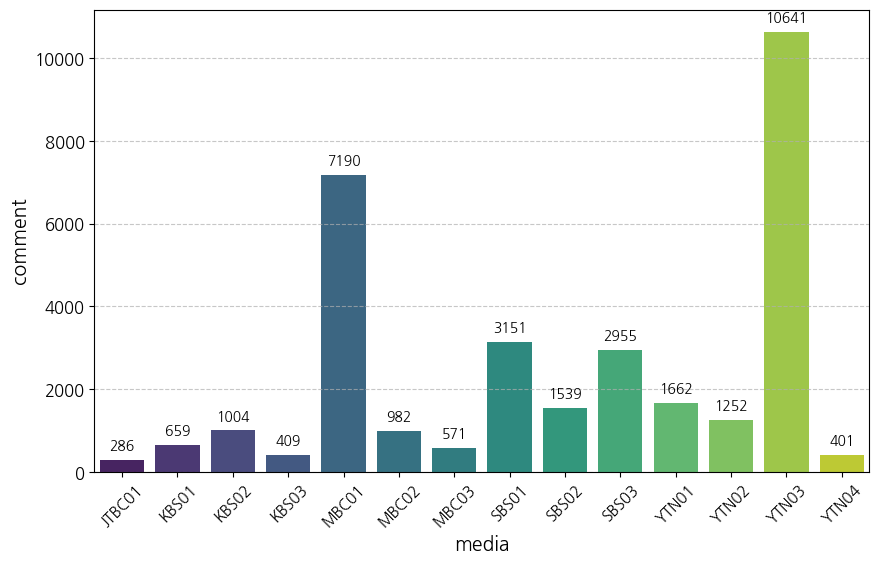

In [13]:
# 미디어별 그래프 그리기

import seaborn as sns
import matplotlib.pyplot as plt

# 미디어별 댓글수 데이터 준비
media_comment_count = df['media'].value_counts().sort_index()

# 시각화
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=media_comment_count.index, y=media_comment_count.values, palette='viridis')
plt.xlabel('media', fontsize = 14)                              # xlabel 폰트 사이즈 조절
plt.ylabel('comment', fontsize  = 14)                           # ylabel 폰트 사이즈 조절
#plt.title('청년정치관련 연도별 뉴스 기사 빈도수(1990-2023)', fontsize  = 17)  # title 폰트 사이즈 조절
plt.xticks(rotation=45, fontsize  = 11)                             # 폰트 사이즈 조절
#plt.xticks(fontsize  = 12)                                         # 폰트 사이즈 조절
plt.yticks(fontsize  = 12)

plt.grid(axis='y', linestyle='--', alpha=0.7)

# 각 막대 위에 기사 수 표시
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}',
                xy=(p.get_x() + p.get_width() / 2, height),
                xytext=(0, 5),  # 5 points vertical offset
                textcoords='offset points',
                ha='center', va='bottom')

plt.show()

## 형태소 분석 실시

In [14]:
from kiwipiepy import Kiwi

# 형태소 분석기 초기화
kiwi = Kiwi()

################################################################################################################
# 사용자 정의 고유 명사 추가를 위한 함수 정의

def add_custom_words(kiwi, word_list, pos='NNP'):
    """
    kiwi 객체에 사용자 정의 단어를 추가하는 함수.

    Parameters:
    - kiwi: Kiwi 객체
    - word_list: 사용자 정의 단어 리스트 (리스트 또는 튜플 형태)
    - pos: 품사 태그 (기본값: 'NNP')
    """
    for word in word_list:
        kiwi.add_user_word(word, pos)

# 사용자 정의 고유 명사 리스트 정의
custom_words = ['오성홍기', '소수민족', '미세먼지', '신장위구르자치구', '일제강점기', '방탄소년단', '사도광산', '동북삼성', '노노재팬', '노노차이나', 'K팝', 'K드라마',
                '샤이닝니키', '난징대학살', '미스터션샤인', '네다짱', '찡짱쫑', '칭챙총', '워차오', '차오니마', '느검', '소서팔', '엄크', '병크', '종중',
                '엄근진', '개꿀띠', '안물안궁', '인싸', '개꿀', '솔까말', '피꺼솟', '기레기', '핑프', '짜파구리', '잼민이', '입꾹닫', '타이완넘버원',
                '눈뜨고코베이징', '우한코로나', '우한바이러스', '우한패렴', '리틀차이나', '코베이징', '짱녀', '더불어바친당', '더불어만진당', '쿼드', '파이브아이즈',
                '소한민국', '문화침탈', '헬조선', '한복챌린지', '탈중국', '좌빨', '중화민족', '중국몽', '아꾹닫', '문화속국', '오미크론', '손민수',
                '소중국', '조선구마사', '좌좀', '문화강도', '문화거지국', '떼국놈', '눈막귀막', '더불어공산당', '옌지', '범내려온다', '프리지아',
                '아미', '개한민국', '뇌절', '탈중국', '대깨문', '서경덕', '왕이', '사도광산', '종북좌파', '개븅', 'K문화', 'K전통음식', '국뽕'
                '친중', '종북', '아몰랑', '죽창가', '반크', '더불어남조선로동당', '씹선비', '문화공정', '대깨문', '대림동', '혐중', '짱꿜라', '리그오브레전드',
                '찢짜이밍', '구김당', '문화확산', '문화침탈', '국힘당', '한한령', '라카이코리아', '능지', '드릉드릉', '닝닝', '멸공', '재일동포', '재중동포', '재미동포'
                '짭중국', '을사오적', '더불면죽는당', '윤뚱도리', '꼬긁', '핑핑이', '진핑이', '시진핑핑이', '징핑이', '시진퐁', '십진핑', '쭝궈', '쭝국', '중궈', '쭝국', '듕귁',
                '쭝귀', '쭝꿔', '뗏놈','짠꿰놈', '뙷놈', '땡놈', '땟놈', '뙤놈', '짱괘', '짱꿰', '때국', '짭중국', '짱꿜라', '베이징동계올림픽','대림족',
                '초우니마', '로씨야족', '동북공정', '국민청원', '옌볜조선족자치주', '옌볜족', '동계올림픽', '복붙', '개새끼',
                # 추가 단어들...
]

# 사용자 정의 고유 명사를 한 번에 추가
add_custom_words(kiwi, custom_words)

#################################################################################################################

# 불용어 목록 정의 - 더 추가할 수 있음
stopwords = {'에휴', '에효', '쯧쯧', '휴', '하', '헐', '어휴', '이번', '이제', '동안',}

# 키워드 추출 함수 정의
def extract_keywords(text):
    analysis = kiwi.analyze(text)
    # 분석 결과가 여러 개일 수 있으므로 첫 번째 결과만 사용
    res = analysis[0][0]
    return [word + ('다' if tag in ['VV', 'VA'] else '')  # 동사에 '다' 추가
            for word, tag, _, _ in res
            if tag in ['NNG', 'NNP', 'VV','VA' ] and word not in stopwords and len(word) > 1]

# 키워드 추출 적용
df['comment_키워드'] = df['comment'].apply(extract_keywords)
print(df['comment_키워드'].head(30))

0                                             [이재명, 쎄쎄]
1                                     [조선족, 동포, 중국, 한복]
2                      [찍히다, 조선족, 조선, 문화, 우리나라, 문화, 구식]
3                                     [나라, 중국, 문화, 버리다]
4          [한국, 조선족, 조선족, 본인, 얘기, 조선족, 차이나, 개간나색히, 이성계]
5                                          [서로, 입장, 차이]
6     [조선족, 대림족, 부르다, 재미, 동포, 재일동포, 재독동포, 대림족, 절대, 조...
7     [만두, 기원, 중국, 한국, 들여오다, 재료, 만드다, 만두, 한국, 중국, 중국...
8                               [한복, 다니다, 문화, 지키다, 막히다]
9                        [한국, 원조, 중국, 건너가다, 국경, 한국, 한복]
10                                         [북쪽, 옛날, 한복]
11    [정체, 조선족, 문제, 중국인, 인정, 문화, 고수, 궤변, 선조, 중국, 정착,...
12                                    [중국인, 미국, 문화, 미국]
13                                        [타이거, 장대, 열사]
14    [한국, 사람, 미국, 이민, 국적, 바꾸다, 한복, 하내요, 미국, 한복, 한반도...
15                            [좌파, 미국, 한국, 소개, 중공, 지들꺼]
16                               [중국, 조선족, 인대, 한국, 조선족]
17                                              

<ipython-input-14-df44791acff1>:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['comment_키워드'] = df['comment'].apply(extract_keywords)


##3.코멘트 키워드 빈도수

In [15]:
df['comment_키워드'][:50]

,comment_키워드
0,"[이재명, 쎄쎄]"
1,"[조선족, 동포, 중국, 한복]"
2,"[찍히다, 조선족, 조선, 문화, 우리나라, 문화, 구식]"
3,"[나라, 중국, 문화, 버리다]"
4,"[한국, 조선족, 조선족, 본인, 얘기, 조선족, 차이나, 개간나색히, 이성계]"
5,"[서로, 입장, 차이]"
6,"[조선족, 대림족, 부르다, 재미, 동포, 재일동포, 재독동포, 대림족, 절대, 조..."
7,"[만두, 기원, 중국, 한국, 들여오다, 재료, 만드다, 만두, 한국, 중국, 중국..."
8,"[한복, 다니다, 문화, 지키다, 막히다]"
9,"[한국, 원조, 중국, 건너가다, 국경, 한국, 한복]"


In [16]:
#Counter()로 빈도수 세기
total_keywords = [keyword for sublist in df['comment_키워드'] for keyword in sublist]        # total_keywords 전체 명사 리스트
total_counts = Counter(total_keywords)                                                    # 전체 토큰수: 256150 토큰
sum(total_counts.values())

256150

In [17]:
# 전체 키워드 파일 다운로드
from google.colab import files

df_total = pd.DataFrame(list(total_counts.items()), columns=['키워드', '빈도수'])
df_total = df_total.sort_values(by='빈도수', ascending=False)           # 빈도수 기준으로 정렬
df_total.to_csv('total_counts.csv', encoding='utf-8-sig', index=False)  # to_csv()로
files.download('total_counts.csv')                                      # 파일다운로드

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [18]:
# 데이터프레임을 입력으로 하면 최빈도 1000 키워드 추출하고 데이터프레임으로 반환하는 함수
def df_to_1000_keywords(df_data):

   """데이터프레임을 입력으로 하면 최빈도 1000 키워드 추출하고 데이터프레임으로 반환하는 함수"""

   keywords = [keyword for sublist in df_data for keyword in sublist]         # keywords 전체 키워드 리스트
   counts = Counter(keywords)                                                 # counts 전체 키워드, 빈도수 튜플
   top_1000_keywords = counts.most_common(1000)                               # 빈도수 상위 1000 키워드

   #데이터프레임으로 보기
   top_1000_keywords = pd.DataFrame(top_1000_keywords, columns=['키워드', '빈도수'])

   return top_1000_keywords

In [19]:
# df_to_1000_keywords()에 df['제목_키워드']를 입력해서 전체 키워드 빈도수 상위 1000 추출

df_1000_keywords = df_to_1000_keywords(df['comment_키워드'])
df_1000_keywords

,키워드,빈도수
0,중국,15636
1,한국,7782
2,문화,7468
3,나라,6157
4,한복,4623
...,...,...
995,조국,33
996,조공,33
997,클라스,33
998,범죄,33


# 4.키워드 네트워크

In [20]:
import pandas as pd
import networkx as nx
from itertools import combinations
from google.colab import files

In [21]:
G = nx.Graph()

# 모든 행에 대해 반복
for index, row in df.iterrows():
    # 바이그램 생성 (같은 토큰이 쌍을 이루지 않도록)
    bigrams = [combo for combo in combinations(row['comment_키워드'], 2) if combo[0] != combo[1]]
    for bigram in bigrams:
        if G.has_edge(*bigram):
            G[bigram[0]][bigram[1]]['weight'] += 1
        else:
            G.add_edge(bigram[0], bigram[1], weight=1)

# 자기 자신과의 연결(루프) 제거
G.remove_edges_from(nx.selfloop_edges(G))

# 네트워크 행렬 생성
adj_matrix = nx.to_pandas_adjacency(G, weight='weight')

In [22]:
adj_matrix

,이재명,쎄쎄,조선족,동포,중국,한복,찍히다,조선,문화,우리나라,...,볼빠,덴마크,에스토니아,코스보,관통,가먀히,지맘데,여고,관으심,전라디언
이재명,0.0,1.0,39.0,0.0,573.0,31.0,1.0,12.0,38.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
쎄쎄,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
조선족,39.0,0.0,0.0,533.0,9064.0,3675.0,2.0,1979.0,4268.0,118.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,1.0,0.0
동포,0.0,0.0,533.0,0.0,671.0,241.0,0.0,79.0,179.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
중국,573.0,0.0,9064.0,671.0,0.0,6467.0,3.0,2550.0,11209.0,1173.0,...,1.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
가먀히,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
지맘데,0.0,0.0,2.0,0.0,4.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0
여고,0.0,0.0,1.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0
관으심,0.0,0.0,1.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0


In [23]:
# 전체 명사, 빈도수 튜플을 딕셔너리로 변경
frequency = dict(total_counts)
len(frequency)

frequency

{'이재명': 466,
 '쎄쎄': 3,
 '조선족': 3769,
 '동포': 269,
 '중국': 15636,
 '한복': 4623,
 '찍히다': 9,
 '조선': 1097,
 '문화': 7468,
 '우리나라': 1337,
 '구식': 1,
 '나라': 6157,
 '버리다': 196,
 '한국': 7782,
 '본인': 191,
 '얘기': 245,
 '차이나': 50,
 '개간나색히': 1,
 '이성계': 8,
 '서로': 12,
 '입장': 403,
 '차이': 83,
 '대림족': 2,
 '부르다': 226,
 '재미': 26,
 '재일동포': 16,
 '재독동포': 1,
 '절대': 14,
 '칭호': 3,
 '붙이다': 46,
 '만두': 23,
 '기원': 70,
 '들여오다': 3,
 '재료': 11,
 '만드다': 334,
 '중국식': 11,
 '한국식': 26,
 '다니다': 167,
 '지키다': 1220,
 '막히다': 84,
 '원조': 86,
 '건너가다': 36,
 '국경': 14,
 '북쪽': 22,
 '옛날': 144,
 '정체': 279,
 '문제': 1184,
 '중국인': 1149,
 '인정': 591,
 '고수': 8,
 '궤변': 10,
 '선조': 146,
 '정착': 21,
 '습관': 16,
 '개인': 112,
 '뿌리': 168,
 '권리': 60,
 '미국': 1013,
 '타이거': 2,
 '장대': 1,
 '열사': 11,
 '사람': 2502,
 '이민': 66,
 '국적': 222,
 '바꾸다': 195,
 '하내요': 2,
 '한반도': 258,
 '세계': 1270,
 '퍼지다': 69,
 '굳히다': 3,
 '금지': 46,
 '좌파': 148,
 '소개': 250,
 '중공': 520,
 '지들꺼': 90,
 '인대': 3,
 '모르다': 1090,
 '외국': 119,
 '국민': 1409,
 '이름': 253,
 '교포': 110,
 '윈리': 1,
 '우기다': 670,
 '진짜': 

In [24]:
# 상위 1000개 키워드 네트워크
sorted_frequency = sorted(frequency.items(), key=lambda x: x[1], reverse=True)[:1000]
top_1000_words = [word for word, freq in sorted_frequency]

top_1000_words[:10]

['중국', '한국', '문화', '나라', '한복', '장관', '조선족', '정부', '사람', '민족']

In [25]:
# 인접 행렬에서 선택된 단어에 해당하는 행과 열만 선택
filtered_adj_matrix = adj_matrix.loc[top_1000_words, top_1000_words]

# 결과 출력
print(filtered_adj_matrix)

          중국       한국       문화      나라      한복      장관     조선족      정부  \
중국       0.0  13101.0  11209.0  5939.0  6467.0  1695.0  9064.0  2498.0   
한국   13101.0      0.0   6867.0  2948.0  4020.0   797.0  5429.0  1037.0   
문화   11209.0   6867.0      0.0  4283.0  2457.0  1019.0  4268.0   840.0   
나라    5939.0   2948.0   4283.0     0.0  1518.0  1092.0  1231.0   793.0   
한복    6467.0   4020.0   2457.0  1518.0     0.0   294.0  3675.0   379.0   
..       ...      ...      ...     ...     ...     ...     ...     ...   
조국      19.0     20.0     12.0    14.0     2.0     3.0     2.0    13.0   
조공      26.0      9.0      8.0    14.0     4.0     2.0     1.0     4.0   
클라스     18.0      2.0      5.0     5.0     5.0     4.0     1.0     3.0   
범죄      42.0     30.0     11.0     9.0     2.0     3.0    31.0     4.0   
형태      50.0     59.0     45.0    25.0    57.0     1.0    50.0     3.0   

         사람      민족  ...    진보    불편  무너지다     유학    겨울    조국    조공   클라스  \
중국   3545.0  6734.0  ...  36.0  43

In [26]:
# 인접 행렬을 CSV 파일로 저장
filtered_adj_matrix.to_csv('바이그램_top1000.csv', encoding='utf-8-sig', index=True)   # 한글 깨짐 방지: encoding='utf-8-sig' 추가

# 파일 다운로드
files.download('바이그램_top1000.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>